In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import os 
from pathlib import Path
import re
import PIL
import cv2
import seaborn as sns 
import copy
import importlib

import spectral_util
importlib.reload(spectral_util)
from spectral_util import *

import fluorescence_util
importlib.reload(fluorescence_util)
from fluorescence_util import *


In [2]:
# 'board.xlsx'
# 'board_noFlux.xlsx'
# 'flux_20240925_184835.xlsx'
# 'flux-onBoard.xlsx'
# 'lead_noFlux.xlsx'

# srcbase = Path("./data/EEM_F-7000_2025-04-11/")
print(Path.cwd())
srcbase = Path("./data/EEM_F-7000_2025-05-29/")
dstdir = Path("./dst/eem/filter")

srcdata = [
    {
        "path": fpath,
        "sample": fpath.stem.split("_")[0],  # 'ABS_20250411' → 'ABS'
        "label": None
    }
    for fpath in srcbase.glob("*.xlsx")
]
srcdata

c:\Users\sawamoto24\sawamoto24\修士研究\microplastic


[{'path': WindowsPath('data/EEM_F-7000_2025-05-29/ABS.xlsx'),
  'sample': 'ABS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/HDPE.xlsx'),
  'sample': 'HDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/LDPE.xlsx'),
  'sample': 'LDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PC.xlsx'),
  'sample': 'PC',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PET_20250529_150210.xlsx'),
  'sample': 'PET',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PMMA.xlsx'),
  'sample': 'PMMA',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PP.xlsx'),
  'sample': 'PP',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PS.xlsx'),
  'sample': 'PS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PVC.xlsx'),
  'sample': 'PVC',
  'label': None}]

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].


<Figure size 640x480 with 0 Axes>

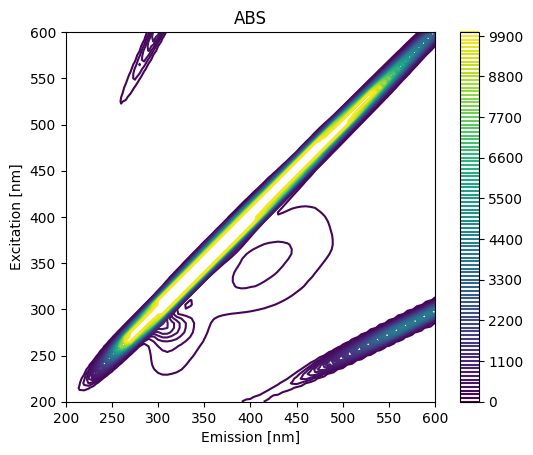

<Figure size 640x480 with 0 Axes>

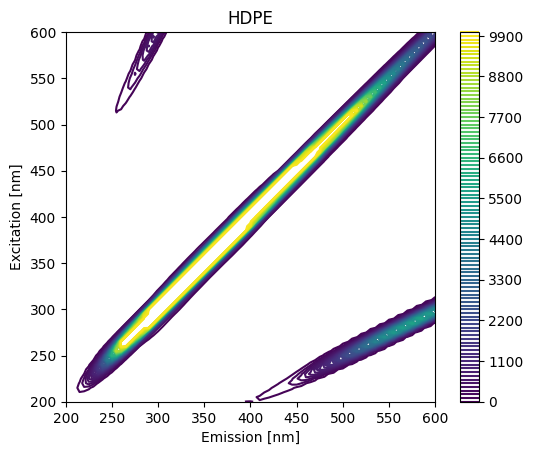

<Figure size 640x480 with 0 Axes>

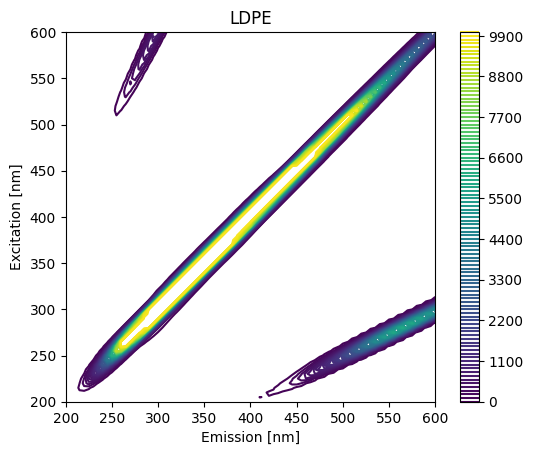

<Figure size 640x480 with 0 Axes>

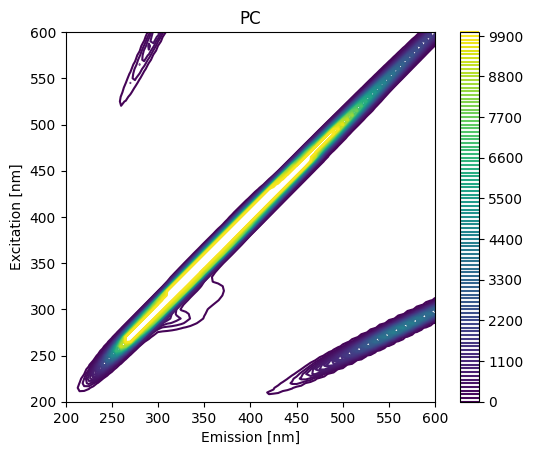

<Figure size 640x480 with 0 Axes>

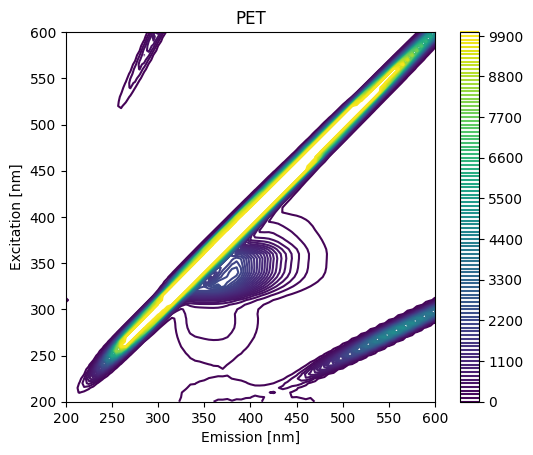

<Figure size 640x480 with 0 Axes>

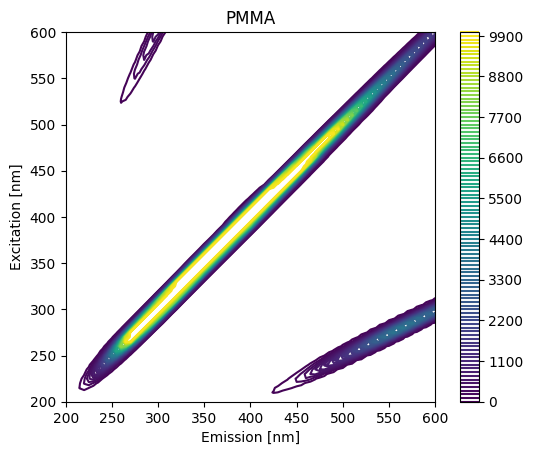

<Figure size 640x480 with 0 Axes>

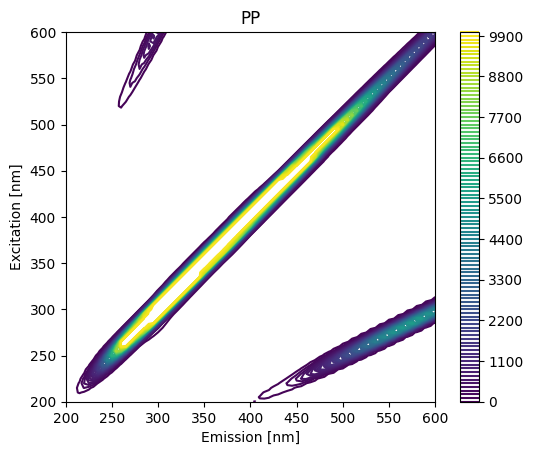

<Figure size 640x480 with 0 Axes>

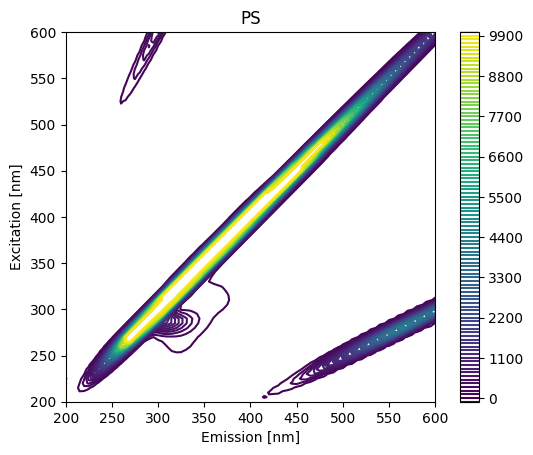

<Figure size 640x480 with 0 Axes>

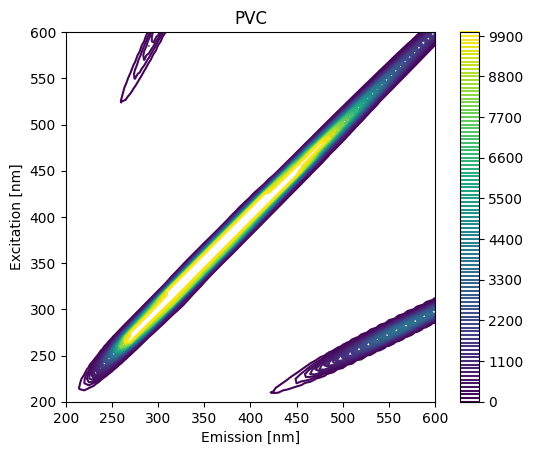

In [3]:
for data in srcdata:
    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()
    eem.plot_contour(level=100, show_sample_name=True)

In [4]:
em_bands = eem.em_bands
ex_bands = eem.ex_bands

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
(9, 71, 71)


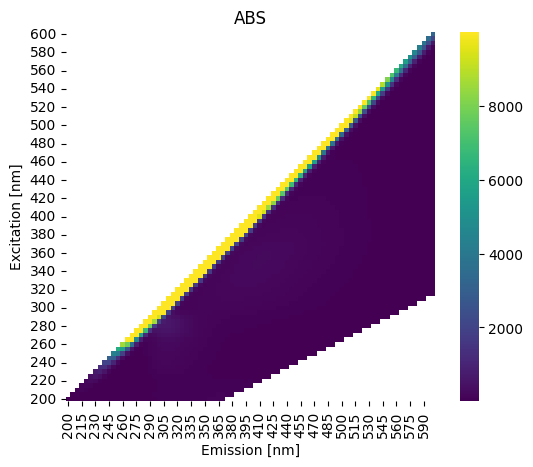

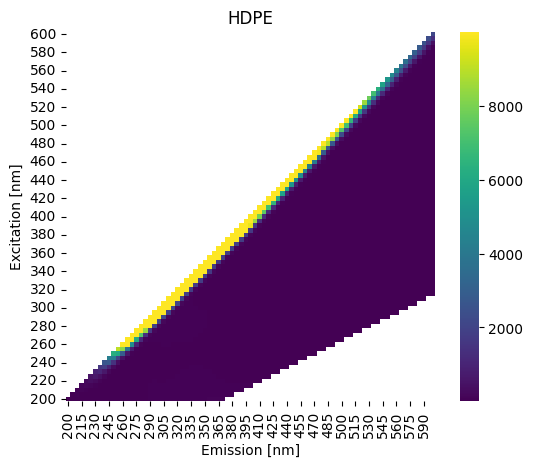

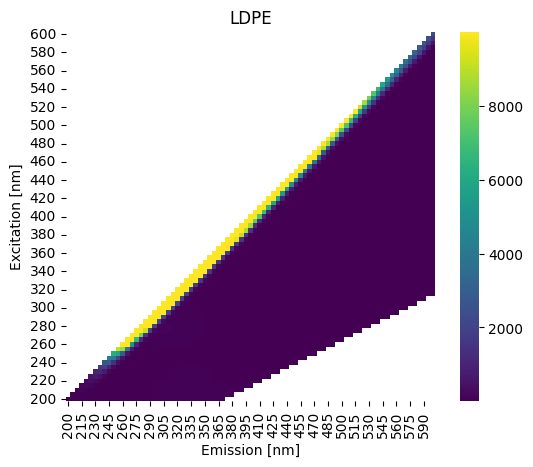

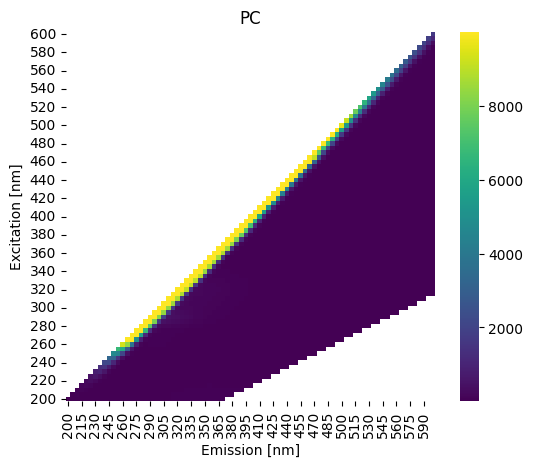

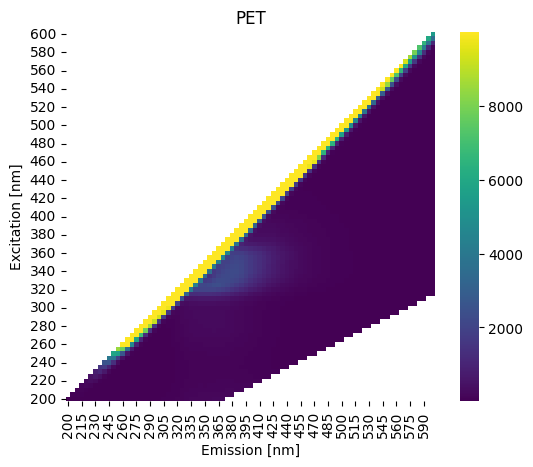

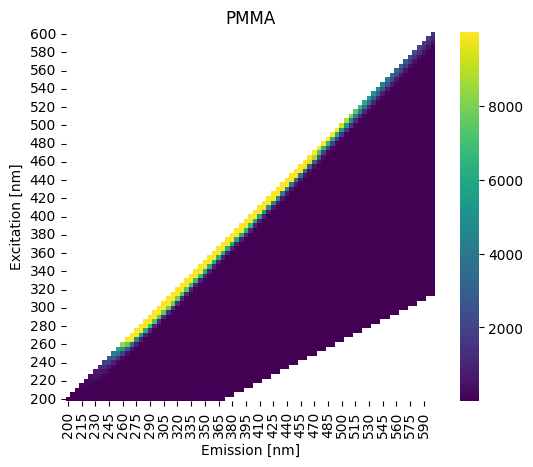

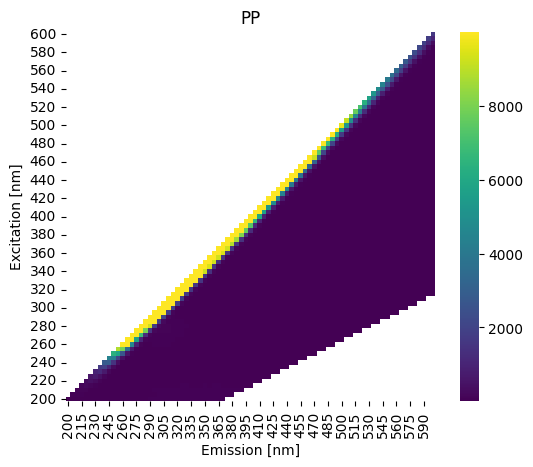

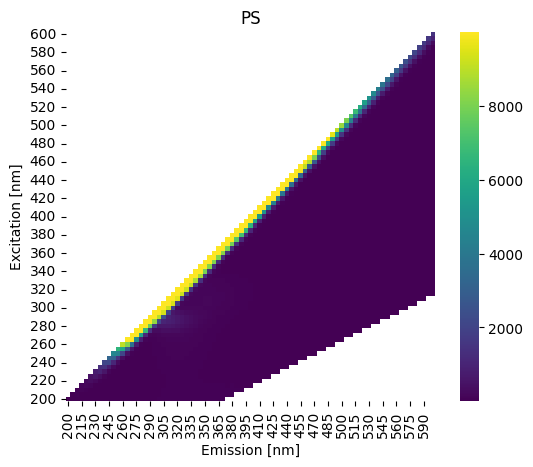

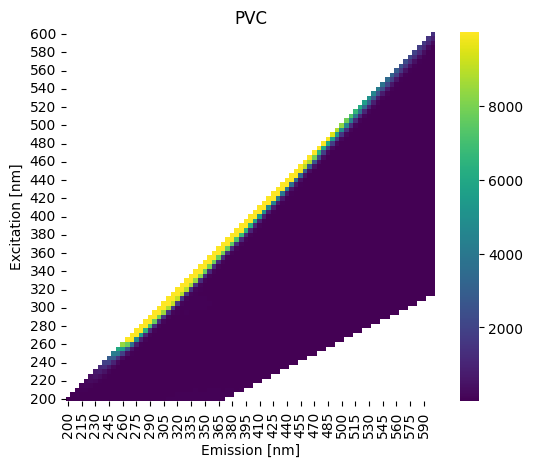

In [5]:
# for data in srcdata:
#     eem = fluorescence_util.EEMF7000(data.get('path'))
#     print(eem)

#     plt.figure()

#     # ① 散乱ピーク除去
#     eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
#                                                        remove_first_order=True, 
#                                                        inplace=True)

#     # ② 追加で散乱領域全体を除去
#     eem.remove_scatter_regions(inplace=True)

#     eem.plot_heatmap()
#     plt.title(eem.sample)

sample_data = []
sample_name = []

for data in srcdata:

    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()

    # ①散乱ピーク除去
    eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
                                                       remove_first_order=False,
                                                        inplace=True)

    # ② 追加で散乱領域全体を除去
    eem.remove_scatter_regions(inplace=True)

    
    # 250nm以上のインデックスを取得
    ex_mask = ex_bands >= 250
    em_mask = em_bands >= 250

    eem.plot_heatmap()
    plt.title(eem.sample)


    eem_matrix = eem.mat  # numpy配列を取り出す

    eem_matrix = np.nan_to_num(eem.mat, nan=0.0)
    eem_matrix_trimmed = eem_matrix[np.ix_(ex_mask, em_mask)]

    sample_data.append(eem_matrix_trimmed)
    sample_name.append(eem.sample)


# numpy配列に保存
eem_array = np.array(sample_data)
print(eem_array.shape)

## 波長域の調整

In [6]:
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# trim
ex_bands = np.array(ex_bands)[ex_mask]
em_bands = np.array(em_bands)[em_mask]

print("Excitation bands ≥ 250nm:", ex_bands)
print("Emission bands ≥ 250nm:", em_bands)


Excitation bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
Emission bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]


## ノイズありサンプルの生成

In [7]:
def augment_eem_per_mp_with_scatter_removal(eem_array, ex_bands, em_bands, n_variants=20, noise_level=0.05, seed=None):
    """
    ノイズ付きEEMを生成し、散乱領域を0にして除去する。

    Parameters:
        eem_array: np.ndarray
            入力EEM配列。shape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（shape = n_ex）
        em_bands: np.ndarray
            蛍光波長リスト（shape = n_em）
        n_variants: int
            各MPごとに生成するノイズ付きEEMの数
        noise_level: float
            ノイズのスケール（最大値に対する割合）
        seed: int or None
            乱数シード

    Returns:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    num_MP, n_ex, n_em = eem_array.shape
    augmented_eems = np.zeros((num_MP, n_variants, n_ex, n_em))

    # # 散乱領域マスク（True: 有効領域, False: 散乱 → 0にする）
    # ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    # valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    for i in range(num_MP):
        base_eem = eem_array[i]
        for j in range(n_variants):
            noise = np.random.normal(loc=0, scale=noise_level * np.max(base_eem), size=base_eem.shape)
            noisy_eem = np.clip(base_eem + noise, 0, None)
            # noisy_eem[~valid_mask] = 0  # 散乱領域を0に
            augmented_eems[i, j] = noisy_eem

    return augmented_eems
# ex_bands, em_bands は np.array で定義されていると仮定
augmented_eems = augment_eem_per_mp_with_scatter_removal(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0.01,
    seed=42
)


### 辞書型への変換と保存

In [8]:
def convert_augmented_eems_to_dict(augmented_eems, sample_names):
    """
    ndarray (num_MP, n_variants, n_ex, n_em) を辞書形式 {sample_name: (n_variants, n_ex, n_em)} に変換。

    Parameters:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
        sample_names: list of str
            サンプル名（MP名）リスト

    Returns:
        dict形式のデータ {sample_name: np.ndarray}
    """
    eem_dict = {}
    for i, name in enumerate(sample_names):
        eem_dict[name] = augmented_eems[i]
    return eem_dict


In [9]:
def save_augmented_eems_dict(eem_dict, filepath='augmented_eems.npz'):
    """
    辞書形式のノイズ付きEEM群を .npz 形式で保存。

    Parameters:
        eem_dict: dict
            {sample_name: np.ndarray of shape (n_variants, n_ex, n_em)}
        filepath: str
            保存先ファイルパス
    """
    np.savez_compressed(filepath, **eem_dict)


In [10]:
# 保存
eem_dict = convert_augmented_eems_to_dict(augmented_eems, sample_name)
save_augmented_eems_dict(eem_dict, filepath='augmented_eems.npz')

# 読み込み
loaded = np.load('augmented_eems.npz')
print(loaded.files)  # ['PET', 'PS', ...]
print(loaded['PET'].shape)  # (n_variants, n_ex, n_em)


['ABS', 'HDPE', 'LDPE', 'PC', 'PET', 'PMMA', 'PP', 'PS', 'PVC']
(50, 71, 71)


### 確認plot

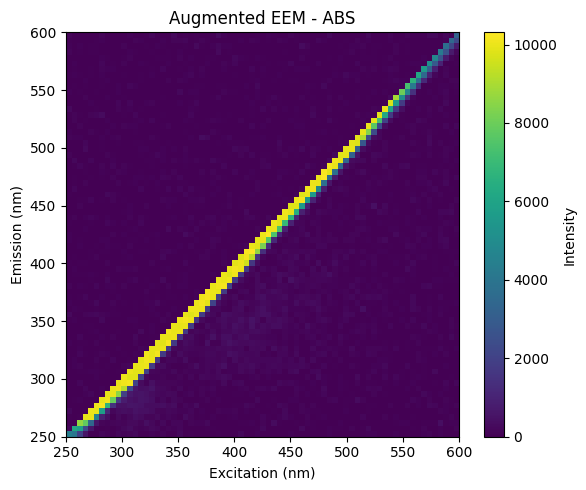

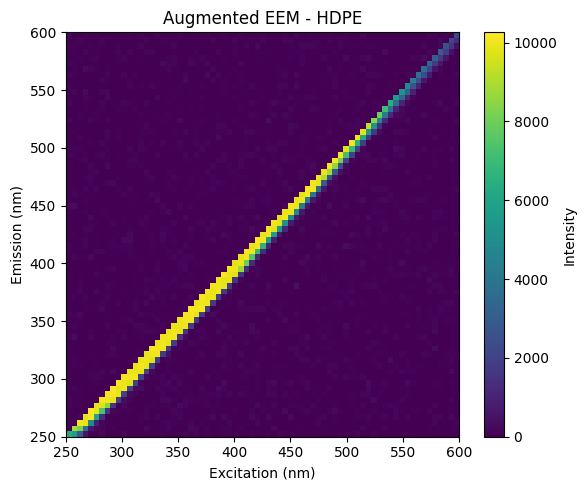

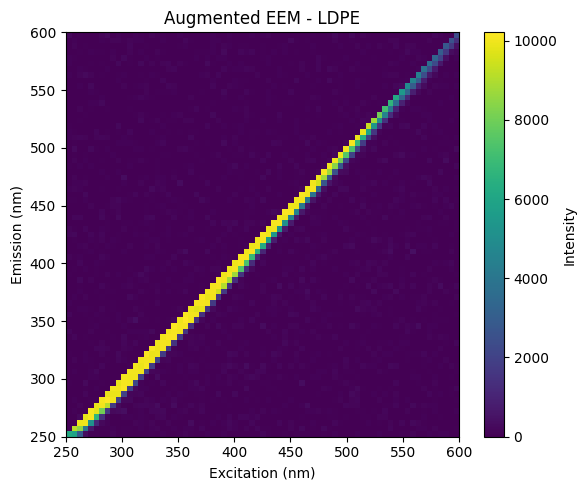

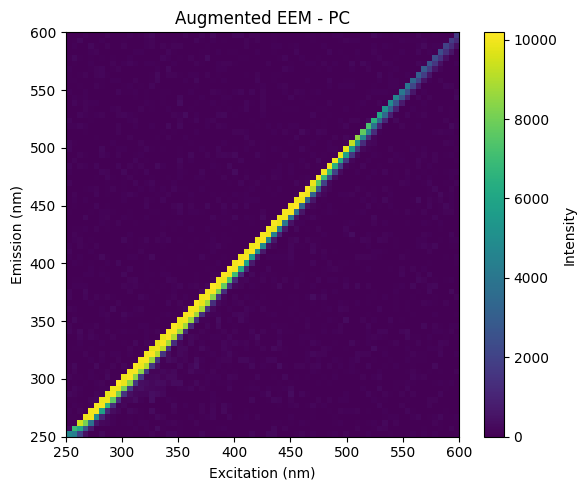

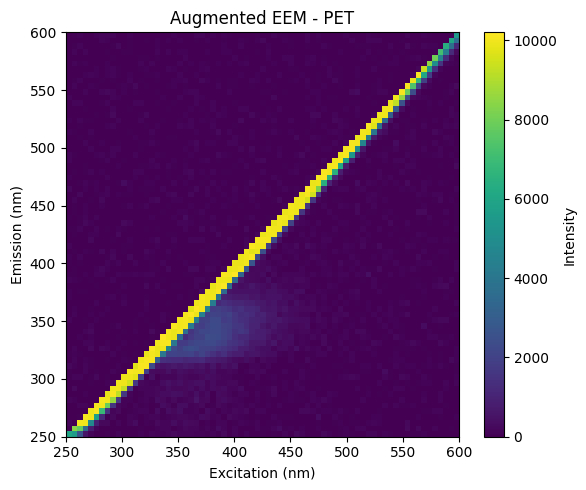

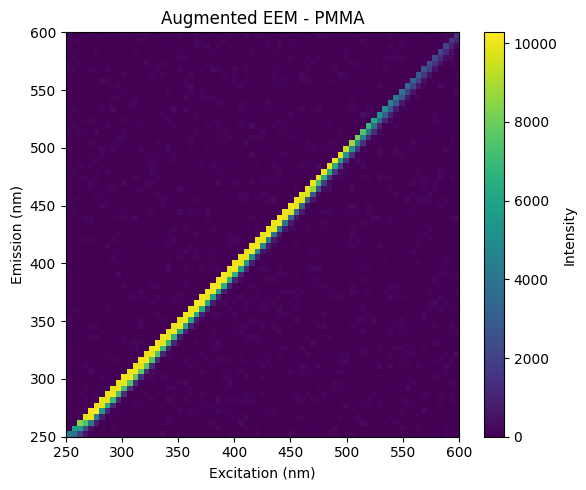

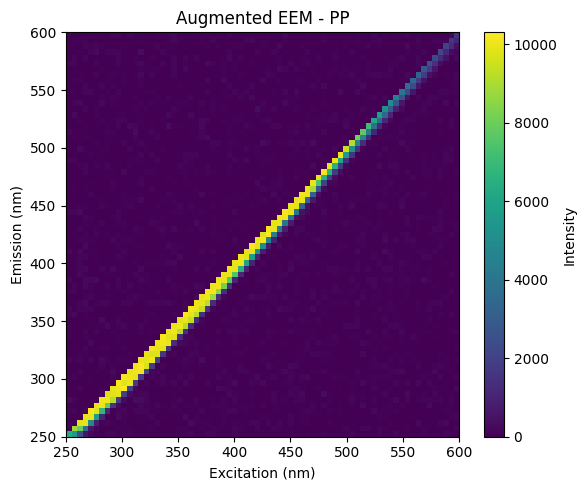

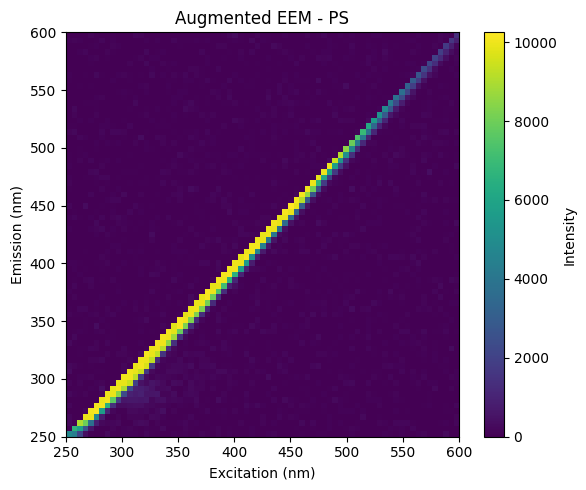

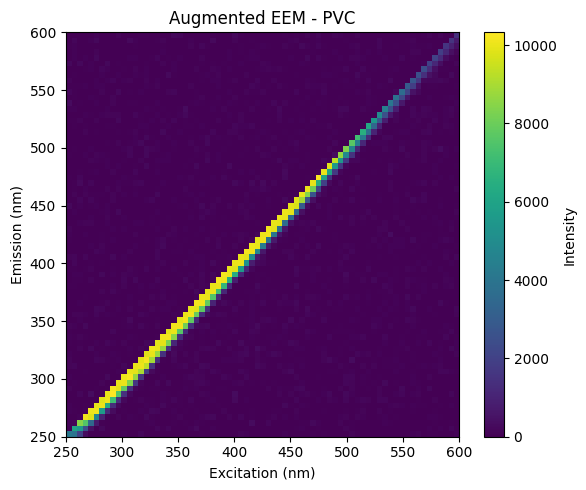

In [11]:
import matplotlib.pyplot as plt

def plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=None):
    """
    各MPから1つずつノイズ付きEEMを、個別にプロット（励起：横軸、放射：縦軸）。

    Parameters:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（横軸）
        em_bands: np.ndarray
            発光波長リスト（縦軸）
        sample_names: list or None
            MPごとの名前リスト（任意）
    """
    num_MP = augmented_eems.shape[0]

    for mp_idx in range(num_MP):
        eem = augmented_eems[mp_idx, 0]  # 各MPで最初のノイズバージョンを表示

        plt.figure(figsize=(6, 5))
        plt.imshow(eem, origin='lower',
                   extent=[ex_bands[0], ex_bands[-1], em_bands[0], em_bands[-1]],
                   aspect='auto', cmap='viridis')

        plt.xlabel('Excitation (nm)')
        plt.ylabel('Emission (nm)')
        title = sample_names[mp_idx] if sample_names else f'MP {mp_idx}'
        plt.title(f'Augmented EEM - {title}')
        plt.colorbar(label='Intensity')
        plt.tight_layout()
        plt.show()

plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=sample_name)


---

# LED SPD

In [12]:
# _param_set = '200to600nm_narrow'
_param_set = '200to600nm_wide'
_params = {
    '200to600nm_narrow':{'wl_start': 200, 'wl_end': 600, 'band_steps': 10, 'band_resolution': 5, 'wl_FWHM': 10},
    '200to600nm_wide':  {'wl_start': 250, 'wl_end': 600, 'band_steps': 10, 'band_resolution': 5, 'wl_FWHM': 50},
    }
param = _params[_param_set]

_wl_bands = np.arange(param['wl_start'], param['wl_end'], param['band_steps'])
_df = pd.DataFrame({'wavelength':_wl_bands, })
_df.loc[:,_wl_bands] = 0

for wl in _wl_bands:
    _df.loc[_df.loc[:,'wavelength']==wl,wl] = 1

wl_sensor = _wl_bands


In [13]:
wl_FWHM = param['wl_FWHM']
var_FEHM = pow(wl_FWHM/2.35, 2)
f"σ={var_FEHM}, for {wl_FWHM} nm of FWHM"

'σ=452.69352648257126, for 50 nm of FWHM'

In [14]:
wl_start = param['wl_start']
wl_end = param['wl_end']
wl_res = param.get('band_resolution',5)
wl = np.array(range(wl_start, wl_end+1, wl_res))
wl_width = wl_end - wl_start
wl_bandstep = param['band_steps']
# wl_peeks = np.array(
#     range(wl_start+round(wl_bandstep/2), wl_end+1, wl_bandstep))
wl_peeks = np.array(range(wl_start, wl_end+1, wl_bandstep))
print("Range: {0}--{1}, ".format(wl_peeks[0],
      wl_peeks[-1]), "Band steps: {}".format(wl_bandstep))

label_wl = '{0}to{1}nm'.format(wl_start, wl_end, )

print(np.array(wl_peeks))
print('# of LEDs: {}'.format(len(wl_peeks)))


Range: 250--600,  Band steps: 10
[250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420
 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600]
# of LEDs: 36


## Make SPD

In [15]:
spds_fill_ = np.array([
    np.exp(-pow(wl - wl_peek_, 2) / var_FEHM)
    for wl_peek_ in wl_peeks
    ])
spds_fill = spds_fill_.T
spds_fill.shape

(71, 36)

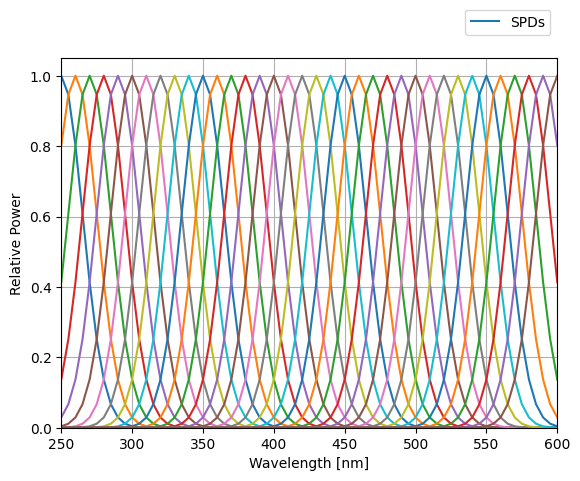

In [16]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.plot(
    wl, spds_fill, label=[
    'SPDs'if i == 0 else '_nolegend_' for i in range(spds_fill.shape[1])])
plt.xlim([wl[0], wl[-1]])
plt.ylim([0, plt.ylim()[1]])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative Power')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1.15))


C:\Users\sawamoto24\AppData\Local\Temp\ipykernel_21868\3723219857.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.15))


array([250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370,
       380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500,
       510, 520, 530, 540, 550, 560, 570, 580, 590, 600])

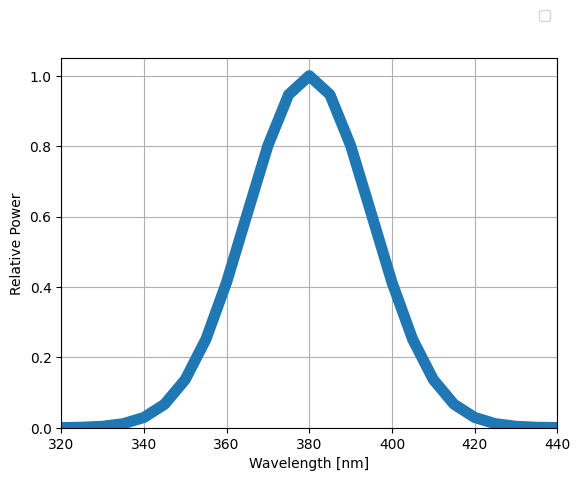

In [17]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.plot(
    wl, spds_fill[:,13], label=[
    'SPDs'if i == 0 else '_nolegend_' for i in [7,]]
, linewidth = 8
    )
# plt.xlim([wl[0], wl[-1]])
plt.xlim([320, 440])
plt.ylim([0, plt.ylim()[1]])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative Power')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1.15))

spds_fill.shape
wl_peeks

----

# camera sensitivity

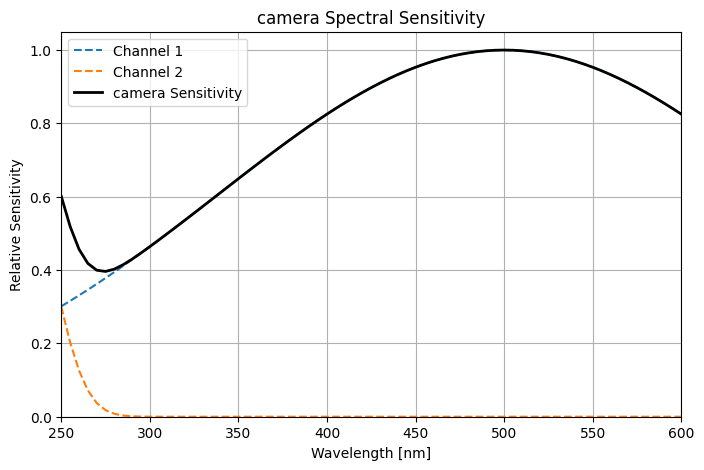

(71,)
(71, 2)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 波長範囲の設定（動的に変更可能）
wl_start = 250  # nm（変更したい開始波長）
wl_end = 600   # nm（変更したい終了波長）
wl_step = 5     # nm（分解能）

# 波長範囲の生成
wavelengths = np.arange(wl_start, wl_end + 1, wl_step)

# チャネルごとの設定
channels = [
    {"peak": 500, "fwhm": 380, "max_val": 1.0},
    {"peak": 230, "fwhm": 40, "max_val": 0.3}
]

# channels = [
#     {"name": "Red",   "peak": 600, "fwhm": 100, "max_val": 0.9},
#     {"name": "Green", "peak": 540, "fwhm": 90,  "max_val": 1.0},
#     {"name": "Blue",  "peak": 460, "fwhm": 80,  "max_val": 0.8}
# ]

# 感度行列（列ごとにチャネル）
sensitivity_all = []

for ch in channels:
    sigma = ch["fwhm"] / 2.355  # FWHMから標準偏差を計算
    sensitivity = np.exp(-0.5 * ((wavelengths - ch["peak"]) / sigma) ** 2)  # ガウス分布
    sensitivity /= np.max(sensitivity)  # 最大値で正規化
    sensitivity *= ch["max_val"]  # 最大感度値でスケーリング
    sensitivity_all.append(sensitivity)

# スタック（shape: (len(wl), 2)）
sensitivity_all = np.stack(sensitivity_all, axis=1)

# 合成：単純加算 → 正規化
camera_sensitivity = np.sum(sensitivity_all, axis=1)
camera_sensitivity /= np.max(camera_sensitivity)

# 描画
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, sensitivity_all[:, 0], label='Channel 1', linestyle='--')
plt.plot(wavelengths, sensitivity_all[:, 1], label='Channel 2', linestyle='--')
# plt.plot(wavelengths, sensitivity_all[:, 2], label='Channel 3', linestyle='--')
plt.plot(wavelengths, camera_sensitivity, label='camera Sensitivity', color='black', linewidth=2)
plt.title('camera Spectral Sensitivity')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative Sensitivity')
plt.grid(True)
plt.legend()
plt.xlim(wl_start, wl_end)  # 波長範囲を設定
plt.ylim(0, 1.05)
plt.show()

# 合成感度の形状を確認
print(camera_sensitivity.shape) # (波長（5step），)
print(sensitivity_all.shape) # (波長（5step），3チャンネル）
# wavelengths


---

# カメラ側にハイパスフィルタを適用

## カットオフ波長の計算

In [19]:
def generate_cutoff_list(peak_wavelengths, fwhm, margin_step, step):
    """
    各LEDに対応するハイパスフィルタのカットオフ波長を計算して返す。

    Parameters:
        peak_wavelengths (list or np.ndarray): 各LEDの中心波長
        fwhm (float): LEDのFWHM（半値幅）
        margin_step (float): 自己反射回避マージンのステップサイズ
        margin_num (int): ステップ数（margin_step × margin_numが追加マージン）

    Returns:
        list of float: 各LEDに対応したカットオフ波長（nm）
    """
    margin = margin_step * step
    cutoff_list = np.array([pw + fwhm + margin for pw in peak_wavelengths])
    
    return cutoff_list

cutoff_list = generate_cutoff_list(wl_peeks, fwhm=50, margin_step=6, step=0)
# cutoff_list の長さは spds_fillの列数と一致させる
if len(cutoff_list) != spds_fill.shape[1]:
    raise ValueError("cutoff_list length must match number of LEDs")

print(f"wl_peeks:{wl_peeks}")
print(f"cutoff_list:{cutoff_list}")



wl_peeks:[250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420
 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600]
cutoff_list:[300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470
 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650]


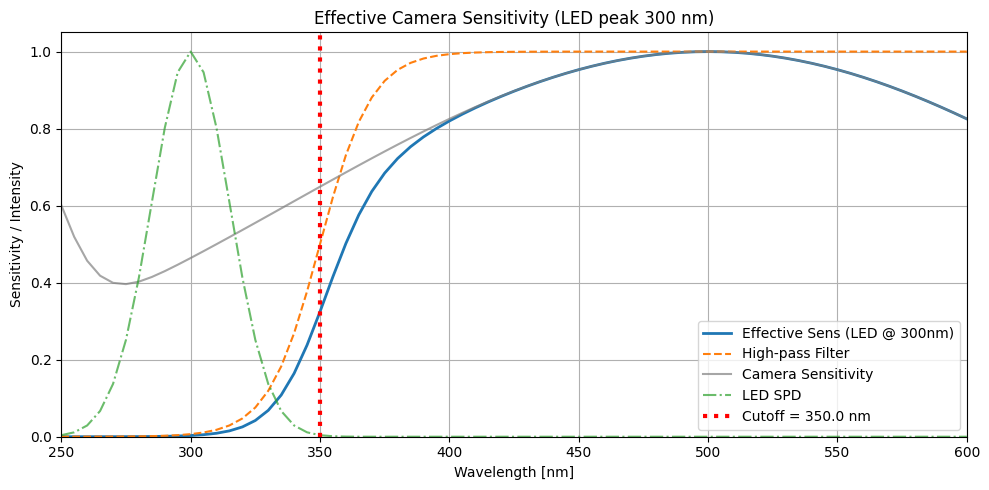

(71, 36)

In [20]:
def generate_hp_filter_matrix(wavelengths, cutoff_list, transition_width):
    hp_matrix = np.zeros((len(wavelengths), len(cutoff_list)))
    for i, cutoff in enumerate(cutoff_list):
        hp_matrix[:, i] = 1 / (1 + np.exp(-(wavelengths - cutoff) / transition_width))
    return hp_matrix

def plot_effective_camera_sens_by_peak(peak_wavelength, wl_peeks, wavelengths,
                                       camera_sensitivity, hp_filter_matrix, spds_fill,
                                       cutoff_list):
    """
    指定したLEDのピーク波長に対応するindexの有効カメラ感度をプロット。
    """
    idx = np.argmin(np.abs(np.array(wl_peeks) - peak_wavelength))
    cutoff = cutoff_list[idx]

    plt.figure(figsize=(10, 5))

    # 有効感度
    plt.plot(wavelengths, effective_camera_sens[:, idx], label=f'Effective Sens (LED @ {wl_peeks[idx]}nm)', linewidth=2)
    
    # ハイパスフィルタ
    plt.plot(wavelengths, hp_filter_matrix[:, idx], label='High-pass Filter', linestyle='dashed')
    
    # カメラ感度
    plt.plot(wavelengths, camera_sensitivity, label='Camera Sensitivity', color='gray', alpha=0.7)
    
    # LED SPD
    if spds_fill is not None:
        plt.plot(wavelengths, spds_fill[:, idx], label='LED SPD', linestyle='dashdot', alpha=0.7)

    # --- カットオフ波長の縦線 ---
    plt.axvline(cutoff, color='red', linestyle='dotted', linewidth=3, label=f'Cutoff = {cutoff:.1f} nm')
    
    plt.title(f'Effective Camera Sensitivity (LED peak {wl_peeks[idx]} nm)')
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Sensitivity / Intensity")
    plt.grid(True)
    plt.legend()
    plt.xlim(wavelengths[0], wavelengths[-1])
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

# 事前定義済みの変数:
# wavelengths, cutoff_list, camera_sensitivity, wl_peaks, spds_fill

# フィルタパラメータ
transition_width = 10  # nm
hp_filter_matrix = generate_hp_filter_matrix(wavelengths, cutoff_list, transition_width)
effective_camera_sens = camera_sensitivity[:, None] * hp_filter_matrix

# === 使用例 ===
plot_effective_camera_sens_by_peak(
    peak_wavelength=300,  # ここを任意で変える
    wl_peeks=wl_peeks,
    wavelengths=wavelengths,
    camera_sensitivity=camera_sensitivity,
    hp_filter_matrix=hp_filter_matrix,
    spds_fill=spds_fill,
    cutoff_list=cutoff_list
)

hp_filter_matrix.shape

---

# 分類器

## 入力データの準備

In [21]:
npz_path='augmented_eems.npz'
data = np.load(npz_path)

# data = np.load(npz_path)
print(data.files)
sample_names = data.files 

['ABS', 'HDPE', 'LDPE', 'PC', 'PET', 'PMMA', 'PP', 'PS', 'PVC']


In [22]:
wavelength_pairs = [
    (270, 320),
    (270, 330),
    (270, 390),
    (280, 330),
    (280, 340),
    (290, 340),
    (320, 380),
    (340, 390),
    (340, 580),
    (350, 420),
    # (270, 320),
]

In [23]:
print(spds_fill.shape)
# print(spds_fill_.shape)
print(ex_bands.shape)
print(em_bands.shape)
print(effective_camera_sens.shape)
# print(selected_excitation_wavelengths.shape)

(71, 36)
(71,)
(71,)
(71, 36)


In [24]:
# 励起波長だけを抜き出してユニーク化
selected_exc_wls = sorted(set([ex for ex, _ in wavelength_pairs]))  # 例: [270, 280, 290, 320, 340, 350]

# 各励起波長に対応するLEDインデックスを取得
led_indices = [np.argmin(np.abs(ex_bands - wl)) for wl in selected_exc_wls]  # たとえば [3, 5, 6, 10, 12, 13]

# データ計算
X = []
y = []

for sample_name in sample_names:
    eems = data[sample_name]  # shape = (n_variants, 71, 71)

    for eem in eems:
        eem = np.nan_to_num(eem)

        # 蛍光スペクトル: (36, 71)
        fluorescence = np.dot(spds_fill.T, eem)

        # カメラ応答: (36,)
        camera_response = np.sum(fluorescence * effective_camera_sens.T, axis=1)

        # wavelength_pairs に出てきた励起波長に対応するLEDの応答値だけ抽出
        selected_responses = camera_response[led_indices]  # shape = (len(led_indices),)

        X.append(selected_responses)
        y.append(sample_name)


In [25]:
X = np.array(X)  # shape → (サンプル数×バリエーション数, 36)
y = np.array(y)
print("X.shape:", X.shape)  # ← (3600, 36) などになればOK！
print("y.shape:", y.shape)
print("クラス:", np.unique(y))


X.shape: (450, 6)
y.shape: (450,)
クラス: ['ABS' 'HDPE' 'LDPE' 'PC' 'PET' 'PMMA' 'PP' 'PS' 'PVC']


---

## SVM

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def train_and_evaluate_svm(X, y, test_size=0.2, random_state=42, verbose=True):
    """
    SVMによる分類モデルの学習と評価を行う関数。
    
    Parameters:
        X: np.ndarray
            特徴量行列（shape: [n_samples, n_features]）
        y: list or np.ndarray
            ラベル（クラス名）のリストまたは配列
        test_size: float
            テストデータの割合（デフォルト: 0.2 = 20%）
        random_state: int
            再現性のための乱数シード
        verbose: bool
            結果を表示するかどうか

    Returns:
        model: 学習済みのSVCモデル
        report: str
            classification_reportの文字列
        conf_matrix: np.ndarray
            混同行列
        accuracy: float
            正解率（Accuracy）
    """
    # 1. データ分割
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # 2. スケーリング
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. SVMの学習
    model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_state)
    model.fit(X_train_scaled, y_train)

    # 4. 評価
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    if verbose:
        print("=== Classification Report ===")
        print(report)
        print("=== Confusion Matrix ===")
        print(conf_matrix)
        print(f"=== Accuracy: {accuracy * 100:.2f}% ===")

    return model, report, conf_matrix, accuracy


In [27]:
model, report, conf_matrix, acc = train_and_evaluate_svm(X, y)


=== Classification Report ===
              precision    recall  f1-score   support

         ABS       1.00      1.00      1.00        10
        HDPE       0.47      0.90      0.62        10
        LDPE       0.00      0.00      0.00        10
          PC       0.42      0.50      0.45        10
         PET       1.00      1.00      1.00        10
        PMMA       0.33      0.40      0.36        10
          PP       0.00      0.00      0.00        10
          PS       1.00      0.60      0.75        10
         PVC       0.35      0.60      0.44        10

    accuracy                           0.56        90
   macro avg       0.51      0.56      0.51        90
weighted avg       0.51      0.56      0.51        90

=== Confusion Matrix ===
[[10  0  0  0  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0  0]
 [ 0  6  0  0  0  2  0  0  2]
 [ 0  2  1  5  0  0  0  0  2]
 [ 0  0  0  0 10  0  0  0  0]
 [ 0  0  2  1  0  4  0  0  3]
 [ 0  1  1  1  0  4  0  0  3]
 [ 0  1  0  2  0  0  0  6  1]


c:\Users\sawamoto24\sawamoto24\修士研究\microplastic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sawamoto24\sawamoto24\修士研究\microplastic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sawamoto24\sawamoto24\修士研究\microplastic\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## PLS-DA

In [28]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(y)  # PLS-DA用の目的変数
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], shape=(450, 9))

In [29]:
# debug
print(Y.shape)
print(X.shape)



(450, 9)
(450, 6)


In [30]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2)  # コンポーネント数は目的に応じて調整
pls.fit(X, Y)


PLSRegression()

クラス ABS の点数: 50
クラス HDPE の点数: 50
クラス LDPE の点数: 50
クラス PC の点数: 50
クラス PET の点数: 50
クラス PMMA の点数: 50
クラス PP の点数: 50
クラス PS の点数: 50
クラス PVC の点数: 50


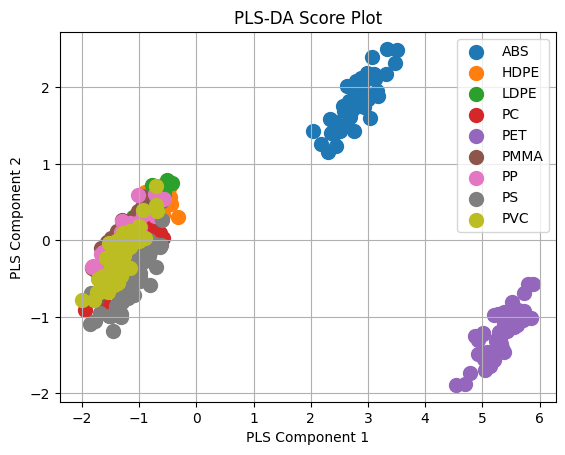

In [31]:
import matplotlib.pyplot as plt
import numpy as np

X_scores = pls.x_scores_

# 念のため y を str 型で統一
y = np.array(y, dtype=str)

for class_label in np.unique(y):
    idx = (y == class_label)
    print(f"クラス {class_label} の点数: {np.sum(idx)}")
    plt.scatter(X_scores[idx, 0], X_scores[idx, 1], label=class_label, s=100)

plt.xlabel("PLS Component 1")
plt.ylabel("PLS Component 2")
plt.title("PLS-DA Score Plot")
plt.legend()
plt.grid(True)
plt.show()


---